In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set path to access CSV
#path = '/content/drive/My Drive/PGML/'
path = '/home/chaitanya/AnacondaProjects/eda-loan/'
#supress scintific notation of values
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [3]:
data_path = path+'loan.csv'
data = pd.read_csv(data_path, low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [4]:
data.shape

(39717, 111)

In [5]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [6]:
#Removing columns which has more than 30% null values in it.
data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [7]:
data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

*'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'* columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [8]:
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [9]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_title              6.19
emp_length             2.71
title                  0.03
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

Removing the the null valued rows in the above columns except 'emp_title' and 'title'

In [10]:
data.dropna(subset=['emp_length', 'revol_util', 'last_pymnt_d', 
                           'last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_title   3.68
title       0.03
dtype: float64

In [11]:
data.nunique().sort_values(ascending=False).head(12)

id                 37835
url                37835
member_id          37835
total_pymnt        36107
total_pymnt_inv    35800
total_rec_int      33663
last_pymnt_amnt    33553
emp_title          28213
revol_bal          21199
title              18677
installment        14720
funded_amnt_inv     7748
dtype: int64

**emp_title, and title** columns have text values which are more unique values.

In [12]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

**id, url, and member_id** having all unique values which means any one of these can be used as primary key.
Let's use **id** primary key and remove url and member id columns.

In [13]:
data.drop(['member_id', 'url'], axis=1, inplace=True)

In [14]:
data.shape

(37835, 40)

Looks like there isn't much change in the number of observation after cleaning it.

#### Variable Data types

In [15]:
data.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

**int_rate and revol_util** are having % values and having data type of object. Let's remove % at the end and convert to float

In [16]:
#stripping % value
data.int_rate = data.int_rate.str.strip('%')
data['int_rate'] = data.int_rate.astype(float)

data.revol_util = data.revol_util.str.strip('%')
data['revol_util'] = data.revol_util.astype(float)

**issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d** are having date values, let convert column data type to date.

In [17]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['last_pymnt_d'] = pd.to_datetime(data.last_pymnt_d, format='%b-%y')
data['last_pymnt_d'] = data['last_pymnt_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['last_credit_pull_d'] = pd.to_datetime(data.last_credit_pull_d, format='%b-%y')
data['last_credit_pull_d'] = data['last_credit_pull_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [18]:
data.dtypes

id                                  int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                           

## Univariate Analysis

### Loan Amount

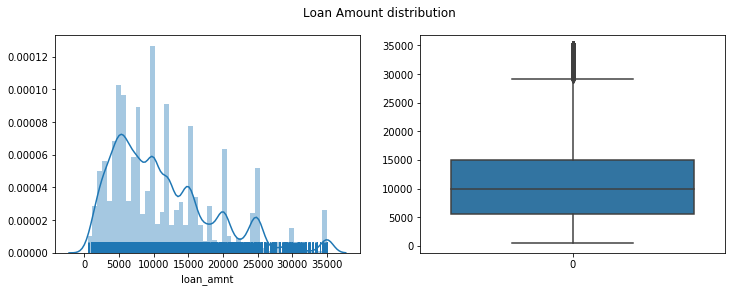

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.show()

From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

In [20]:
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean    11328.32
std      7477.23
min       500.00
5%       2400.00
10%      3250.00
25%      5600.00
50%     10000.00
75%     15000.00
90%     22445.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [21]:
iqr = data.loan_amnt.quantile(0.75) - data.loan_amnt.quantile(0.25)
#no of outliers at right side
outlier_val = data.loan_amnt.quantile(0.75) + 1.5*iqr
(data.loan_amnt > outlier_val).sum()

1211

In [22]:
#Outlier removal
#data = data[data.loan_amnt <= outlier_val]
#data.shape

### funded_amnt
The total amount committed to that loan at that point in time.

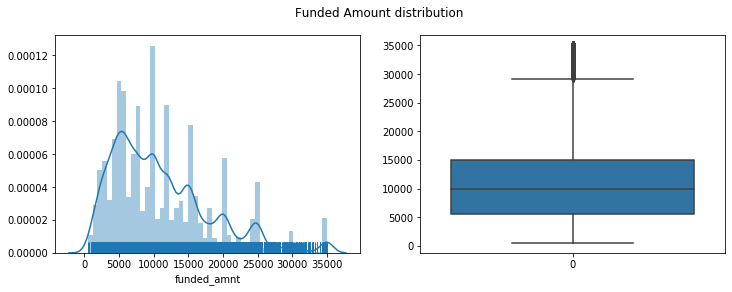

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

funded amount data behaves exactly same to loan Amount

In [24]:
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean    11050.28
std      7204.85
min       500.00
5%       2400.00
10%      3250.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     21000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64

In [25]:
iqr = data.funded_amnt.quantile(0.75) - data.funded_amnt.quantile(0.25)
#no of outliers at right side
outlier_val = data.funded_amnt.quantile(0.75) + 1.5*iqr
(data.funded_amnt > outlier_val).sum()

1024

In [26]:
#Removing Outliers
#data = data[data.funded_amnt <= outlier_val]
#data.shape

### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

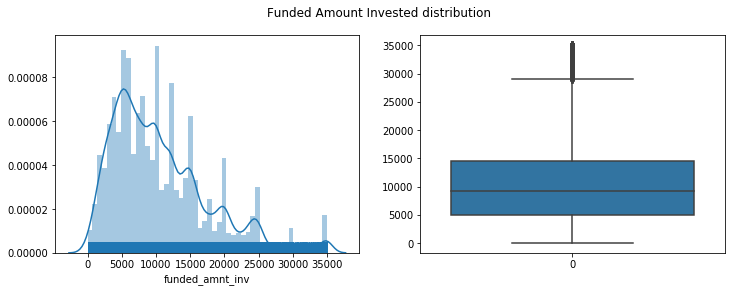

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [28]:
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean    10618.10
std      7113.09
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      9200.00
75%     14602.60
90%     20000.00
95%     24783.27
99%     34750.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

In [29]:
iqr = data.funded_amnt_inv.quantile(0.75) - data.funded_amnt_inv.quantile(0.25)
#no of outliers at right side
outlier_val = data.funded_amnt_inv.quantile(0.75) + 1.5*iqr
(data.funded_amnt_inv > outlier_val).sum()

948

In [30]:
#Outlier removing
#data = data[data.funded_amnt_inv <= outlier_val]
#data.shape

### Interest Rate

count   37835.00
mean       12.07
std         3.73
min         5.42
25%         9.32
50%        11.86
75%        14.61
max        24.59
Name: int_rate, dtype: float64

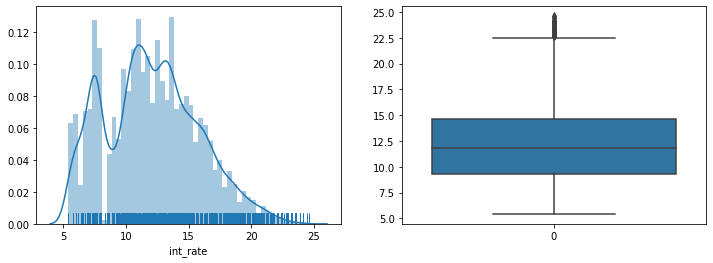

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
data.int_rate.describe()

From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **10% to 15%**. Some people took loan at higher rates of interest i.e., **22.5%**

In [32]:
iqr = data.int_rate.quantile(0.75) - data.int_rate.quantile(0.25)
outlier_val = data.int_rate.quantile(0.75) + (1.5*iqr)
print((data.int_rate > outlier_val).sum(), '****Outliers right***')

#data = data[data.int_rate <= outlier_val]
#data.shape

78 ****Outliers right***


### Installment
The monthly payment owed by the borrower if the loan originates.

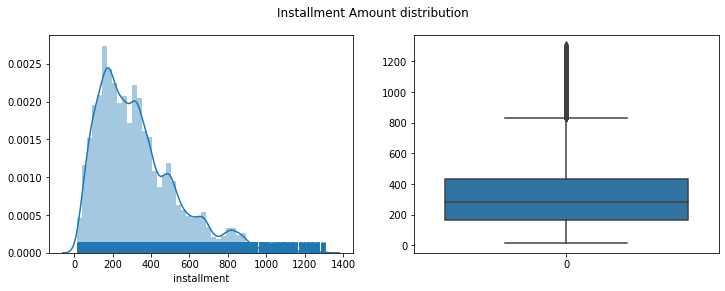

In [33]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

In [34]:
installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean      327.14
std       209.09
min        16.08
5%         74.23
10%       101.34
25%       168.75
50%       283.20
75%       434.75
90%       625.42
95%       767.56
99%       933.14
max      1305.19
Name: installment, dtype: float64

In [35]:
iqr = installment.quantile(0.75) - installment.quantile(0.25)
#no of outliers at right side
outlier_val = installment.quantile(0.75) + 1.5*iqr
print("*****Outlier Right******", (installment > outlier_val).sum())

#removing outliers
#data = data[installment <= outlier_val]
#data.shape

*****Outlier Right****** 1137


# annual_inc
The self-reported annual income provided by the borrower during registration.

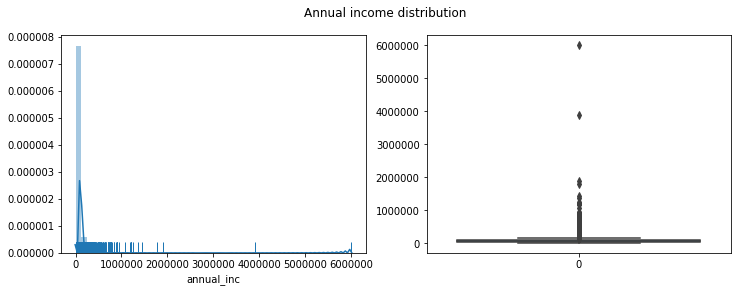

In [36]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

In [37]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     37835.00
mean      69670.97
std       63643.37
min        4000.00
5%        24678.00
10%       30000.00
25%       41886.00
50%       60000.00
75%       83500.00
90%      117008.40
95%      143650.00
99%      235000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [38]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1786 *****Outlier Right******


# dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

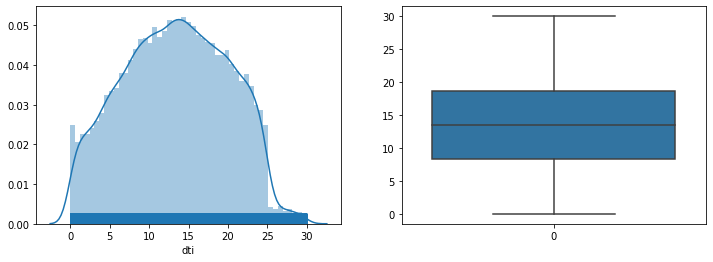

In [39]:
var1 = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

**Conclusions**:<br>
Looks like there are no outliers and the distribution is very much similar to normal distribution.

# open_acc
The number of open credit lines in the borrower's credit file.

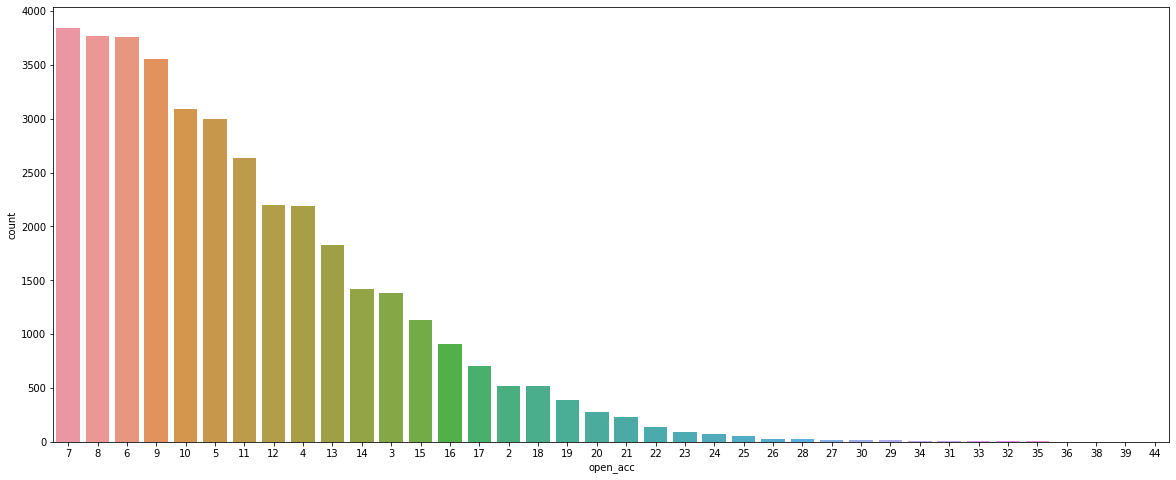

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(data.open_acc, order=data.open_acc.value_counts().index)

# delinq_2yrs
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

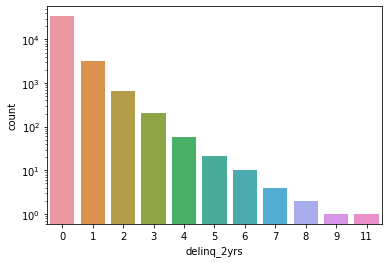

In [136]:
sns.countplot(data.delinq_2yrs)
#scalling to log to view easily
plt.yscale('log')

# inq_last_6mths
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

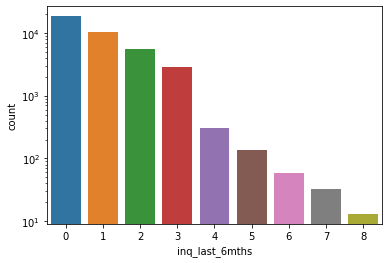

In [42]:
sns.countplot(data.inq_last_6mths)
#scalling to log to view easily
plt.yscale('log')

# pub_rec
Number of derogatory public records

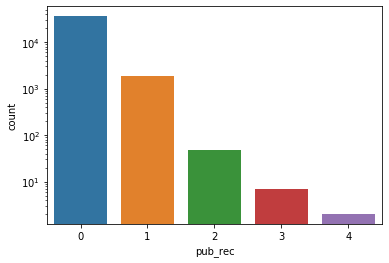

In [43]:
sns.countplot(data.pub_rec)
#scalling to log to view easily
plt.yscale('log')

# revol_bal
Total credit revolving balance

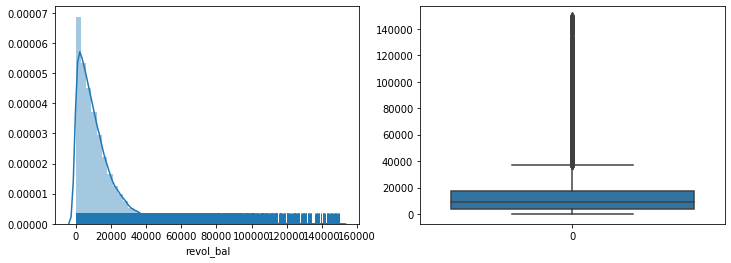

In [44]:
var1 = data.revol_bal

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [45]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    37835.00
mean     13479.95
std      15877.29
min          0.00
5%         358.00
10%       1166.00
25%       3791.00
50%       8978.00
75%      17183.50
90%      29286.60
95%      41834.20
99%      82639.04
max     149588.00
Name: revol_bal, dtype: float64

In [46]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

2380 *****Outlier Right******


# revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

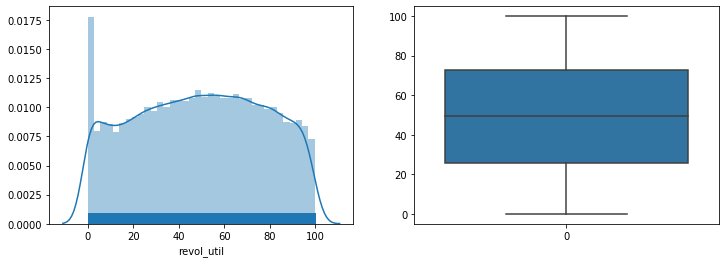

In [47]:
var1 = data.revol_util

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

# total_acc
The total number of credit lines currently in the borrower's credit file

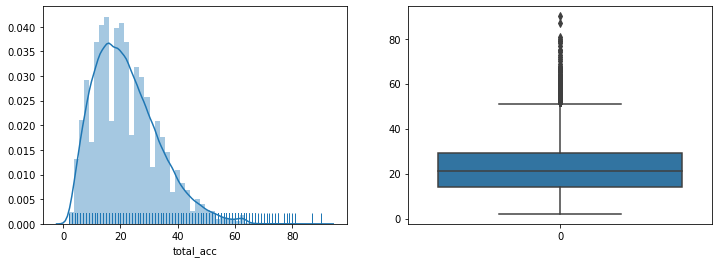

In [48]:
var1 = data.total_acc

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [49]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean       22.20
std        11.38
min         2.00
5%          7.00
10%         9.00
25%        14.00
50%        21.00
75%        29.00
90%        38.00
95%        43.00
99%        56.00
max        90.00
Name: total_acc, dtype: float64

In [50]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

684 *****Outlier Right******


# out_prncp
Remaining outstanding principal for total amount funded

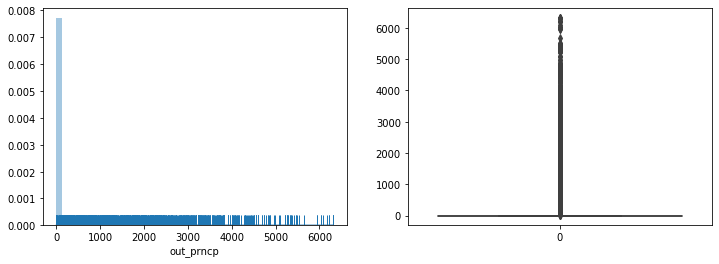

In [51]:
var1 = data.out_prncp

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [52]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean       52.32
std       380.52
min         0.00
5%          0.00
10%         0.00
25%         0.00
50%         0.00
75%         0.00
90%         0.00
95%         0.00
99%      2143.07
max      6311.47
Name: out_prncp, dtype: float64

**Conclusions**:<br>
99% values are 0, only 1% have more the 0 outstanding priciple for total funded amount

In [53]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1098 *****Outlier Right******


# out_prncp_inv
Remaining outstanding principal for portion of total amount funded by investors

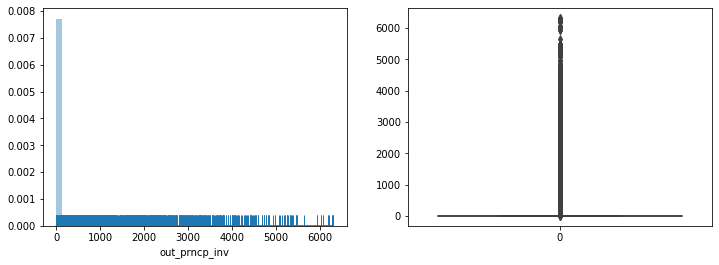

In [54]:
var1 = data.out_prncp_inv

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [55]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean       52.07
std       379.13
min         0.00
5%          0.00
10%         0.00
25%         0.00
50%         0.00
75%         0.00
90%         0.00
95%         0.00
99%      2131.37
max      6307.37
Name: out_prncp_inv, dtype: float64

**Conclusions**:<br>
99% values are 0, only 1% have more the 0 outstanding priciple for total funded amount invested

In [56]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1098 *****Outlier Right******


# total_pymnt
Payments received to date for total amount funded

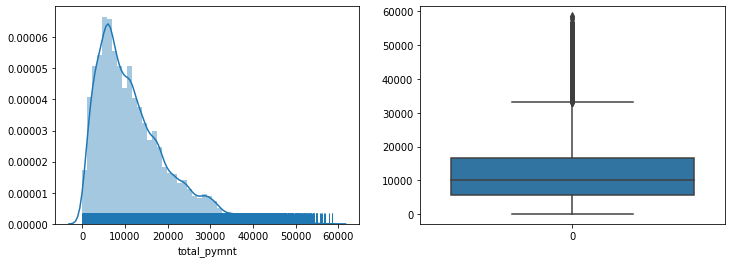

In [57]:
var1 = data.total_pymnt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [58]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean    12310.82
std      9083.32
min        33.73
5%       1999.93
10%      3067.92
25%      5647.30
50%     10072.21
75%     16717.40
90%     24946.27
95%     30416.47
99%     42429.67
max     58563.68
Name: total_pymnt, dtype: float64

In [59]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1262 *****Outlier Right******


# total_pymnt_inv
Payments received to date for portion of total amount funded by investors

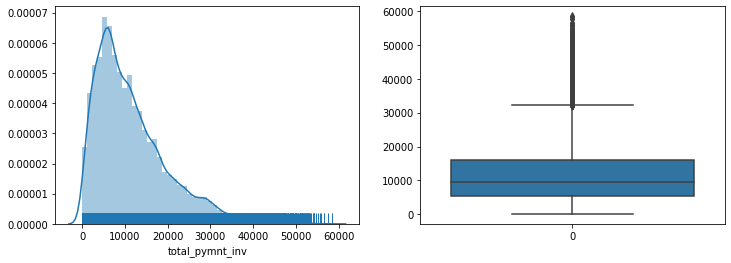

In [60]:
var1 = data.total_pymnt_inv

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [61]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean    11840.84
std      8947.22
min         0.00
5%       1663.31
10%      2737.49
25%      5387.56
50%      9610.88
75%     16106.98
90%     24356.97
95%     29835.96
99%     41705.64
max     58563.68
Name: total_pymnt_inv, dtype: float64

In [62]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1341 *****Outlier Right******


# total_rec_prncp
Principal received to date

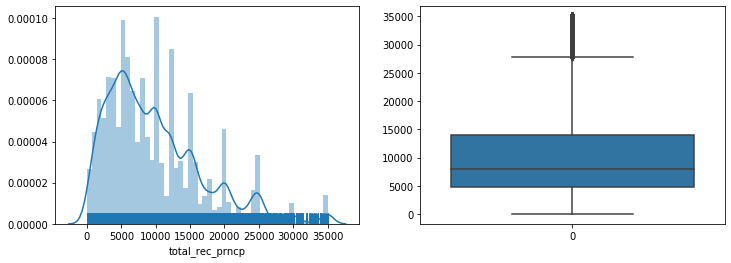

In [63]:
var1 = data.total_rec_prncp

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [64]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean     9912.75
std      7089.36
min         0.00
5%       1405.56
10%      2359.63
25%      4800.00
50%      8000.01
75%     14000.00
90%     20000.00
95%     24999.99
99%     34122.67
max     35000.02
Name: total_rec_prncp, dtype: float64

In [65]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

933 *****Outlier Right******


# total_rec_int
Interest received to date

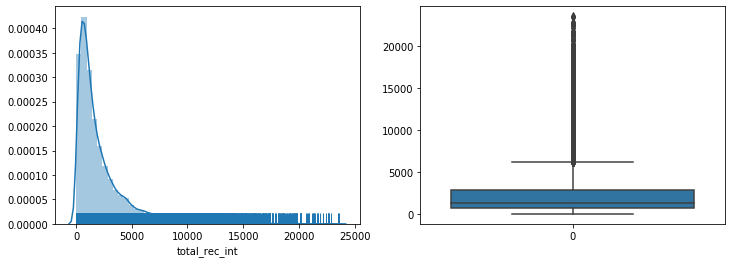

In [66]:
var1 = data.total_rec_int

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [67]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean     2302.18
std      2633.79
min         6.22
5%        197.98
10%       329.71
25%       677.11
50%      1376.24
75%      2889.07
90%      5444.52
95%      7665.67
99%     12873.76
max     23563.68
Name: total_rec_int, dtype: float64

In [68]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

2975 *****Outlier Right******


# total_rec_late_fee
Late fees received to date

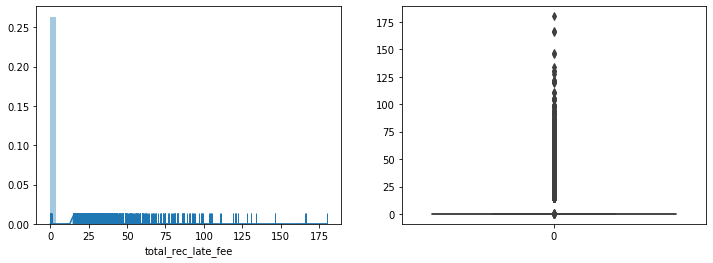

In [69]:
var1 = data.total_rec_late_fee

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [70]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean        1.33
std         7.18
min         0.00
5%          0.00
10%         0.00
25%         0.00
50%         0.00
75%         0.00
90%         0.00
95%        14.89
99%        33.21
max       180.20
Name: total_rec_late_fee, dtype: float64

In [71]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1920 *****Outlier Right******


# recoveries
post charge off gross recovery

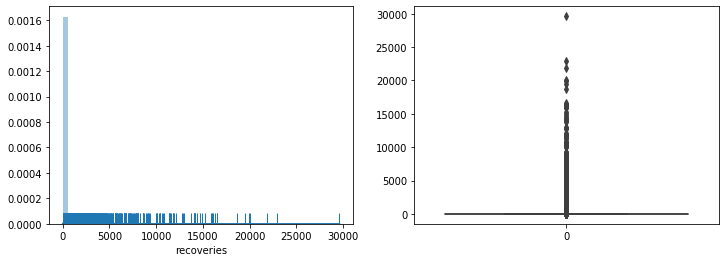

In [72]:
var1 = data.recoveries

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [73]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean       94.55
std       690.38
min         0.00
5%          0.00
10%         0.00
25%         0.00
50%         0.00
75%         0.00
90%        12.01
95%       357.09
99%      2008.91
max     29623.35
Name: recoveries, dtype: float64

In [74]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

3933 *****Outlier Right******


# collection_recovery_fee
post charge off collection fee

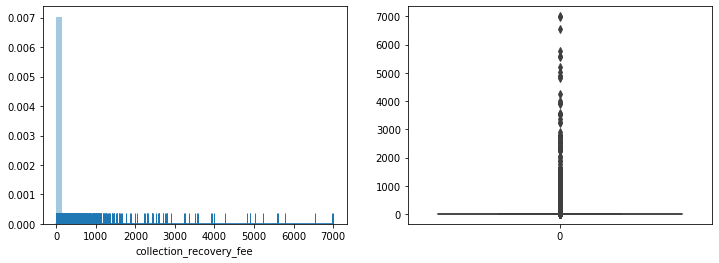

In [75]:
var1 = data.collection_recovery_fee

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [76]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean       12.13
std       148.11
min         0.00
5%          0.00
10%         0.00
25%         0.00
50%         0.00
75%         0.00
90%         0.00
95%         5.03
99%       281.98
max      7002.19
Name: collection_recovery_fee, dtype: float64

In [77]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

3521 *****Outlier Right******


# last_pymnt_amnt
Last total payment amount received

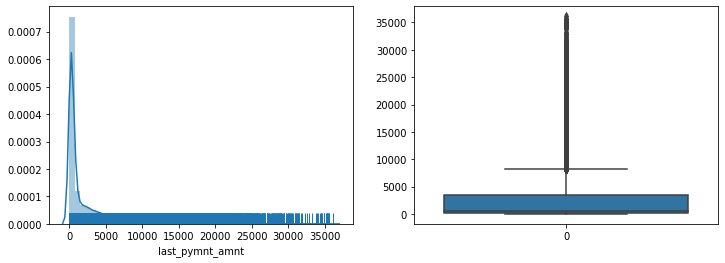

In [78]:
var1 = data.last_pymnt_amnt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [79]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   37835.00
mean     2730.38
std      4489.58
min         0.01
5%         47.06
10%        99.82
25%       224.76
50%       563.43
75%      3400.98
90%      8482.45
95%     12337.60
99%     21252.67
max     36115.20
Name: last_pymnt_amnt, dtype: float64

In [80]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

3986 *****Outlier Right******


# pub_rec_bankruptcies
Number of public record bankruptcies

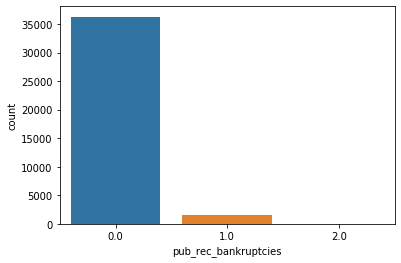

In [81]:
sns.countplot(data.pub_rec_bankruptcies)

<hr>

## Categorical Variables

### Loan issue date (issue_d)

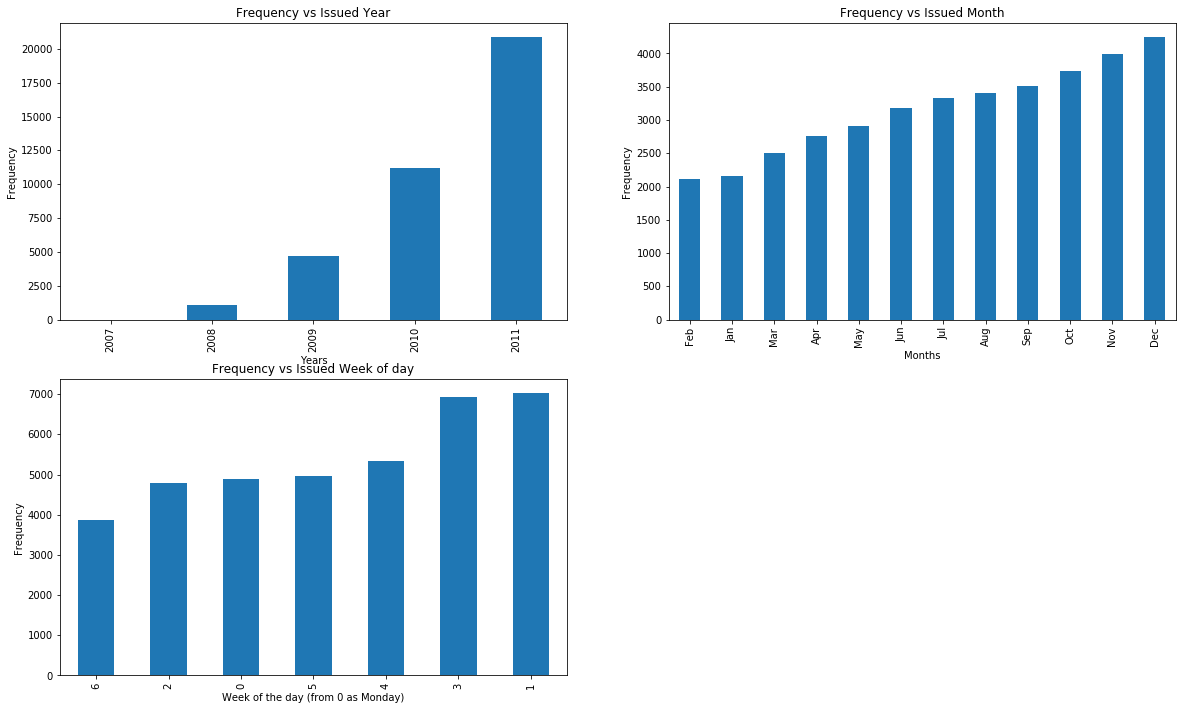

In [82]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
data.issue_d.groupby(data.issue_d.dt.year).count().sort_values().plot.bar()
plt.title('Frequency vs Issued Year')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
data.issue_d.groupby(data.issue_d.dt.strftime("%b")).count().sort_values().plot.bar()
plt.title('Frequency vs Issued Month')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.subplot(2,2,3)
data.issue_d.groupby(data.issue_d.dt.weekday).count().sort_values().plot.bar()
plt.title('Frequency vs Issued Week of day')
plt.xlabel('Week of the day (from 0 as Monday)')
plt.ylabel('Frequency')
plt.show()

**Conclusion** : <br>
The lending club(LC) has doubling loan issues every year. <br>
There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec. <br>
LC has issued more loans on tuesday and wednessday than other week days.

### Erliest Credit line (earliest_cr_line)

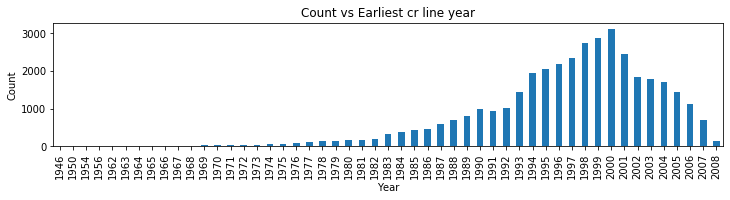

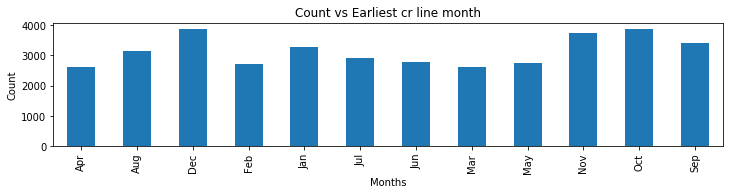

In [83]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
data.issue_d.groupby(data.earliest_cr_line.dt.year).count().plot.bar()
plt.title('Count vs Earliest cr line year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
data.issue_d.groupby(data.earliest_cr_line.dt.strftime("%b")).count().plot.bar()
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Conclusions**: <br>
Many of Loan borrowers of LC have got earlier credit line in 2000 year, and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

### last_credit_pull_d

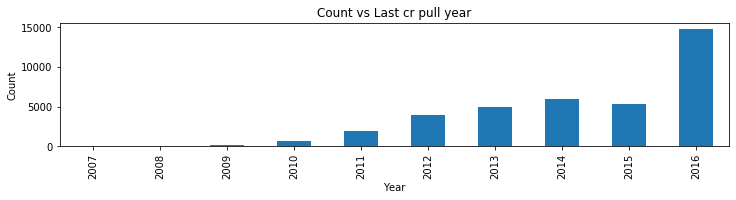

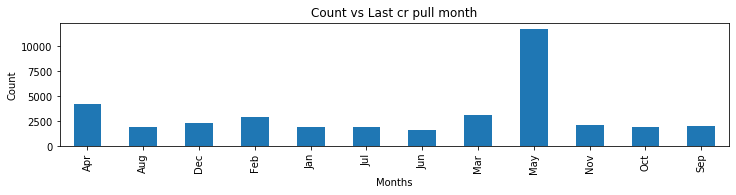

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
data.issue_d.groupby(data.last_credit_pull_d.dt.year).count().plot.bar()
plt.title('Count vs Last cr pull year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
data.issue_d.groupby(data.last_credit_pull_d.dt.strftime("%b")).count().plot.bar()
plt.title('Count vs Last cr pull month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Conclusion**: <br>
LC has done more credid pulls of loans in 2016, and also when we compare between months in May and Apr credit pulls are more.

### Term

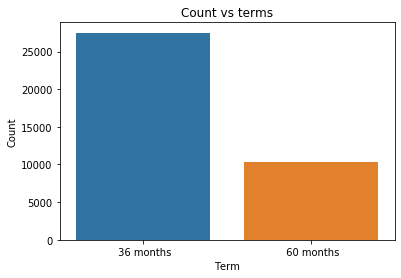

In [85]:
sns.countplot(data.term)
plt.title('Count vs terms')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

**Conclusion**:<br>
Barrowrs have taken 36 months tenure more than 60 months.


### Grade

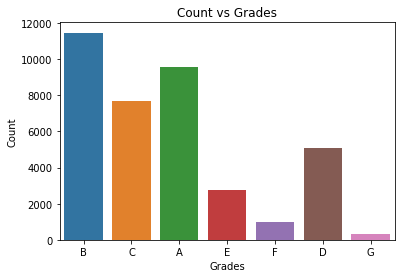

In [86]:
sns.countplot(data.grade)
plt.title('Count vs Grades')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.show()

**Conclusions**: <br>
Most borrowers fall under A and B grades then other grades

###  Sub Grade

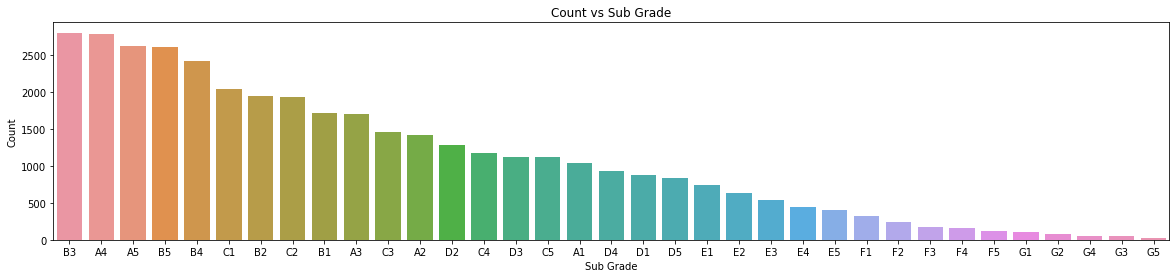

In [87]:
plt.figure(figsize=(20,4))
sns.countplot(data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

### Employment length

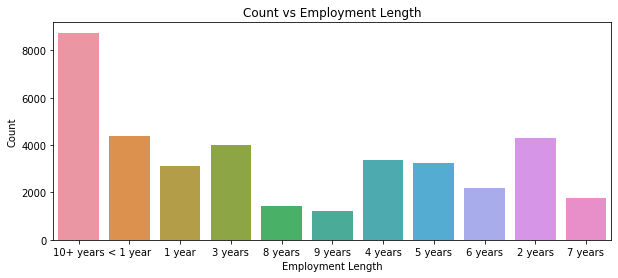

In [88]:
plt.figure(figsize=(10,4))
sns.countplot(data.emp_length)
plt.title('Count vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.show()

**Conclusion**:<br>
Borrowers are mostly 10+ years emploment length.

### Home Ownership

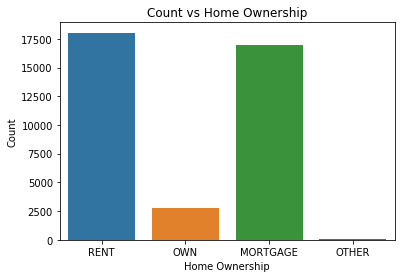

In [89]:
sns.countplot(data.home_ownership)
plt.title('Count vs Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

**Conclusions**:<br>
The loan borrowers are mostly having rented and mortgage houses.

### Verification Status

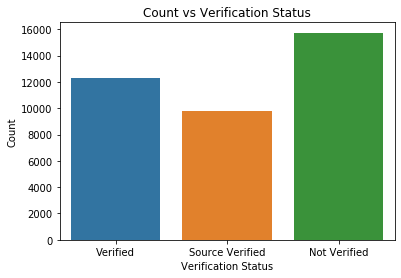

In [90]:
sns.countplot(data.verification_status)
plt.title('Count vs Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

**Conclusions**:<br>
Majority of loans were given without verification of applicants income.

### Loan Status

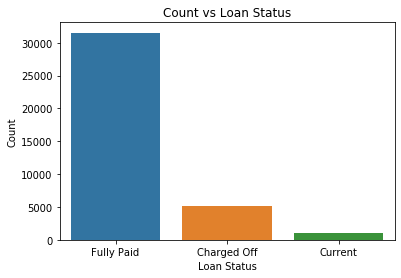

In [91]:
sns.countplot(data.loan_status)
plt.title('Count vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [92]:
data.loan_status.value_counts()*100/data.loan_status.count()

Fully Paid    83.35
Charged Off   13.75
Current        2.90
Name: loan_status, dtype: float64

**Conclusions**:<br>
83% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

### Purpose

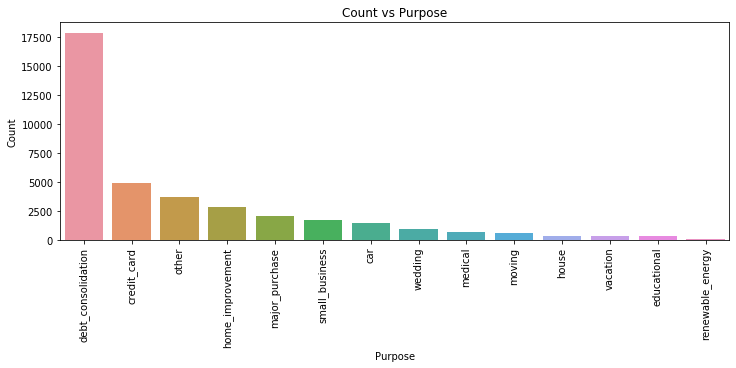

In [93]:
plt.figure(figsize=(12,4))
sns.countplot(data.purpose, order=data.purpose.value_counts().index)
plt.xticks(rotation=90)
plt.title('Count vs Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

**Conclusions**:<br>
Looks line more number of people took loan for _debt consolidation_ and few people took for _renewable energy_

### Borrower's State (add_state)

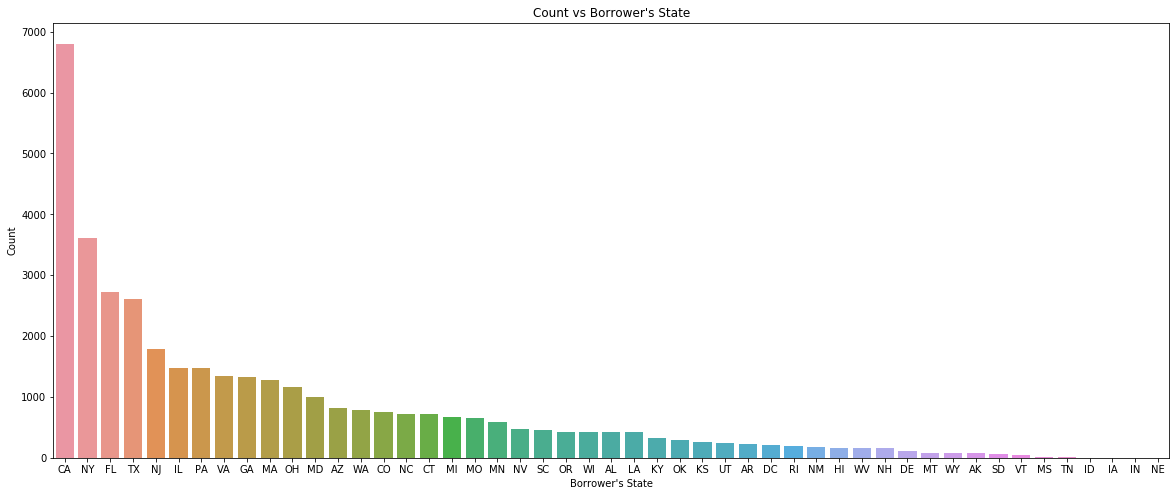

In [94]:
plt.figure(figsize=(20,8))
sns.countplot(data.addr_state, order=data.addr_state.value_counts().index)
plt.title('Count vs Borrower\'s State')
plt.xlabel('Borrower\'s State')
plt.ylabel('Count')
plt.show()

**Conclusions**:<br>
Most of the borrowers are from _CA_ and _NY_

<hr>

## Segmented Univariate Analysis

### Loan Amount

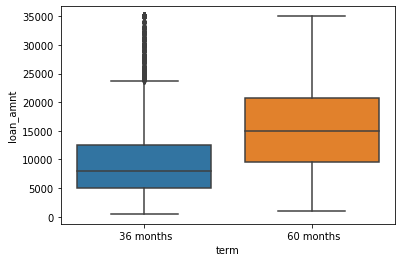

In [138]:
sns.boxplot(x='term', y=data.loan_amnt, data=data)

**Conclusions**:<br>
Higher amount loans have high tenure i.e, 60 months.

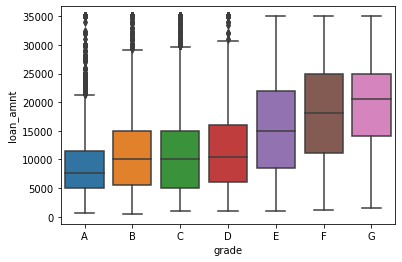

In [139]:
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

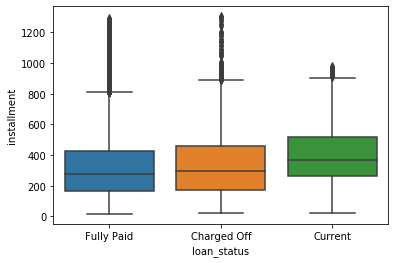

In [97]:
sns.boxplot(x='loan_status', y=data.installment, data=data)

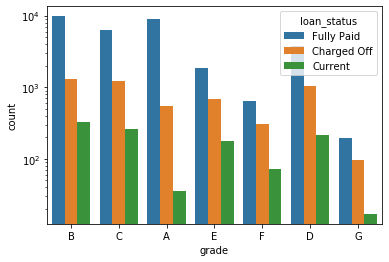

In [98]:
sns.countplot(x='grade', hue='loan_status', data=data)
plt.yscale('log')
plt.show()

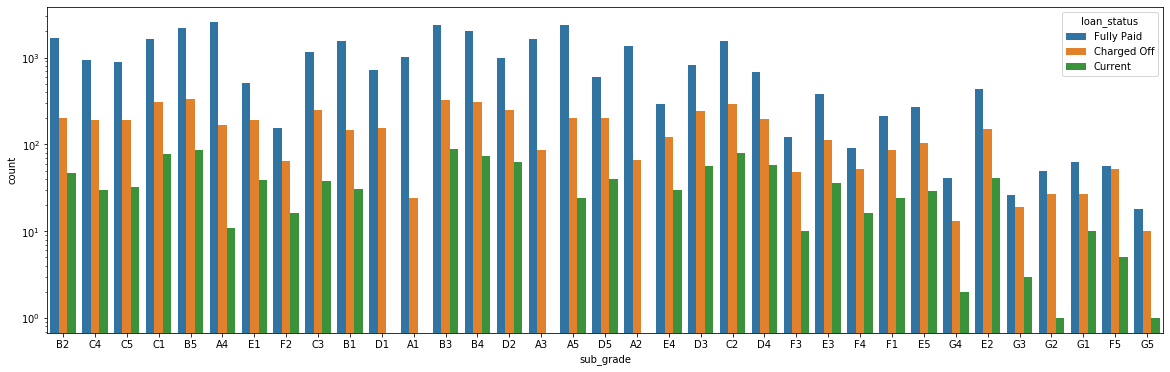

In [99]:
plt.figure(figsize=(20,6))
sns.countplot(x='sub_grade', hue='loan_status', data=data)
plt.yscale('log')
plt.show()

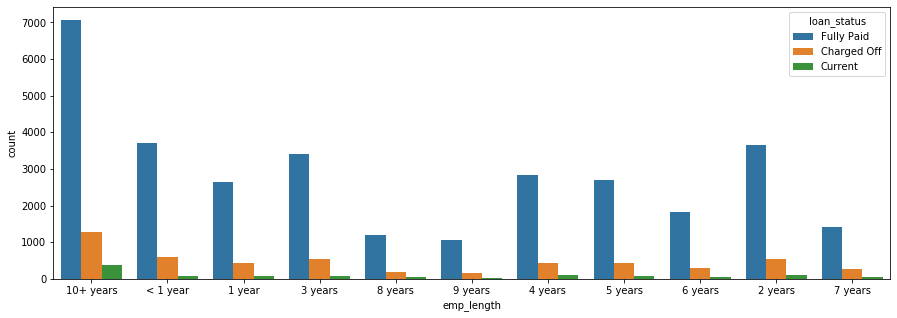

In [100]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length', hue='loan_status', data=data)

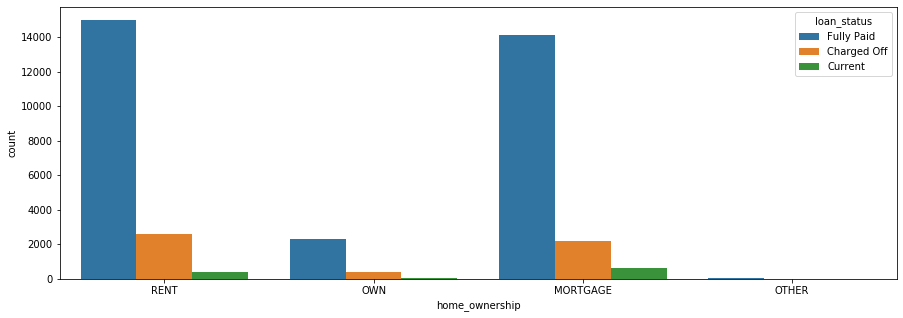

In [101]:
plt.figure(figsize=(15,5))
sns.countplot(x='home_ownership', hue='loan_status', data=data)

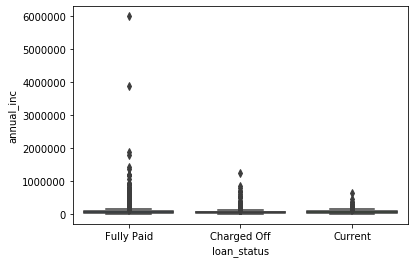

In [102]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)

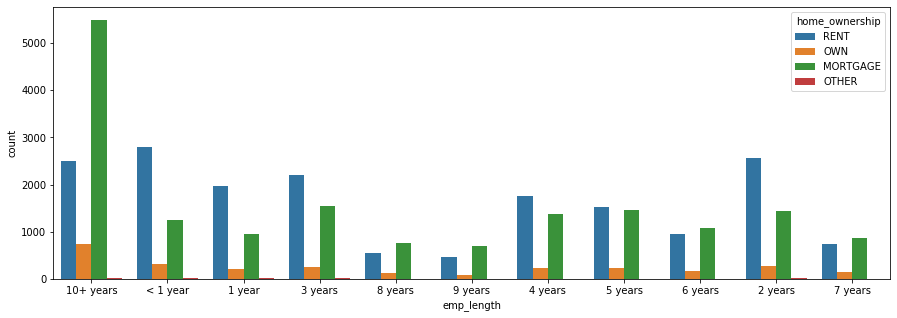

In [103]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length', hue='home_ownership', data=data)

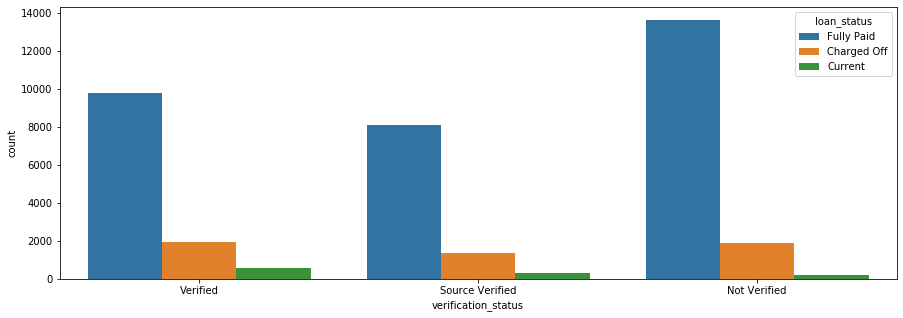

In [104]:
plt.figure(figsize=(15,5))
sns.countplot(x='verification_status', hue='loan_status', data=data)

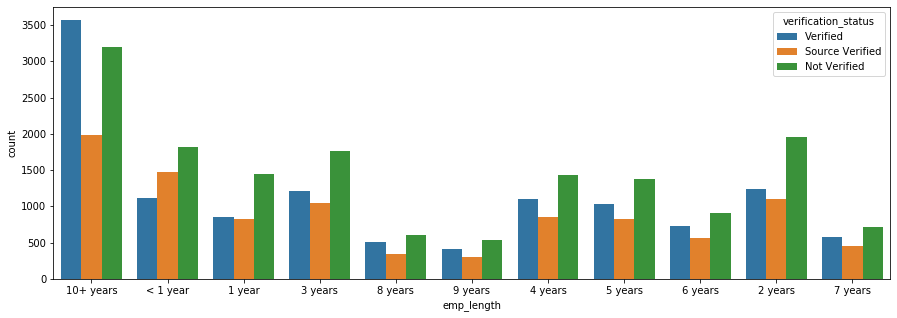

In [105]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length', hue='verification_status', data=data)

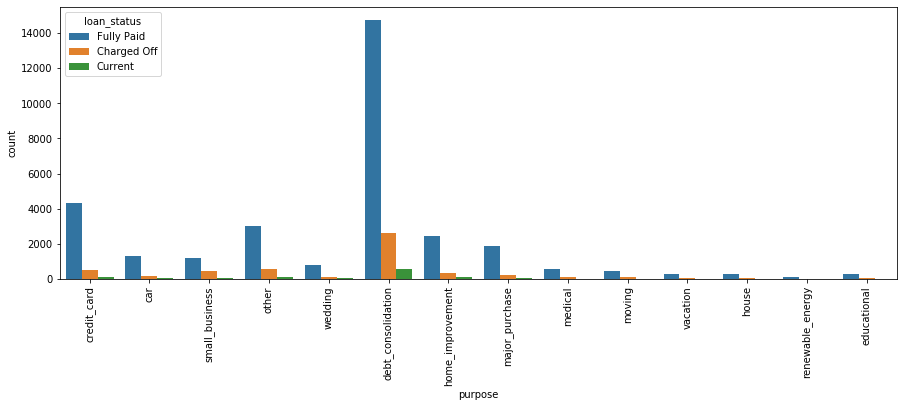

In [106]:
plt.figure(figsize=(15,5))
sns.countplot(x='purpose', hue='loan_status', data=data)
plt.xticks(rotation=90)
plt.show()

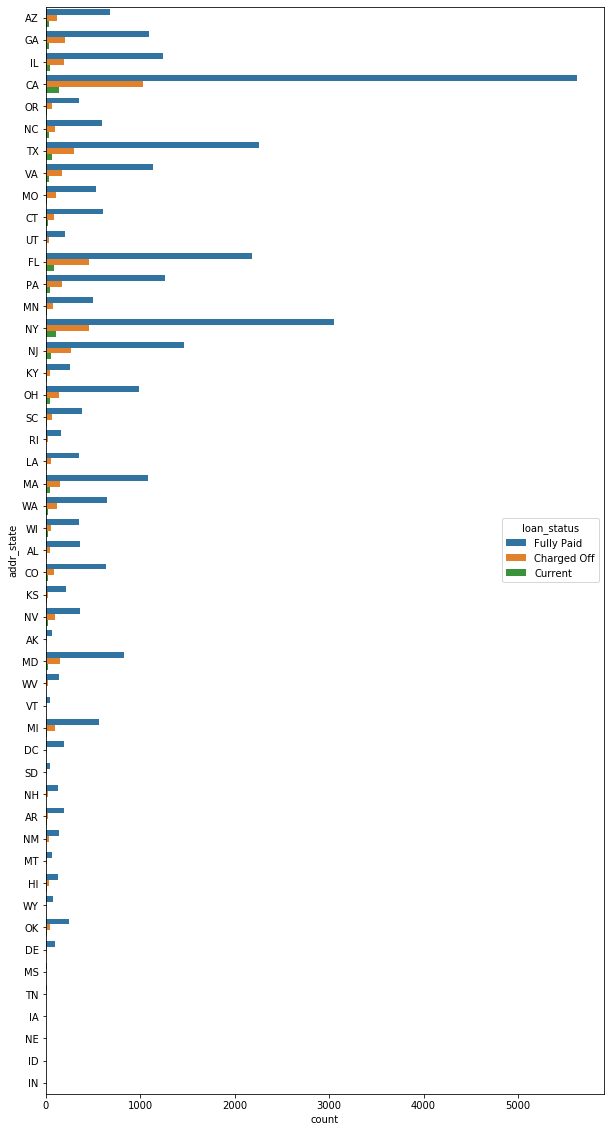

In [107]:
plt.figure(figsize=(10,20))
sns.countplot(y=data.addr_state, hue='loan_status', data=data)

In [108]:
#corr_matrix = data.corr()
#plt.figure(figsize=(20,20))
#ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
#top, bottom = ax.get_ylim()
#ax.set_ylim(top+0.5, bottom-0.5)